## Convolutional Neural Networks (CNN)
## TBD Doing better on Fashion MNIST dataset using CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.optimizers import SGD
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)
# print(X_test[0])

In [ ]:
# Normalise
# X_train = (X_train / 255) - 0.5
# X_test = (X_test / 255) - 0.5

X_train = np.reshape(X_train, (60000, 28, 28, 1))
X_test = np.reshape(X_test, (10000, 28, 28, 1))
# X_test = np.expand_dims(X_test, axis=1)

print(X_train.shape)
print(X_test.shape)
# print(X_test[0])
# plt.imshow(X_train[0])

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# TBD: Use following architecture to classify fashion MNIST dataset
# activation function is relu for all layers except last where its softmax

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(64, 4, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, 4, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

# 1 Convolutional Layer (filters = 64, kernel_size = 4)
# 2 Convolutional Layer (filters = 64, kernel_size = 4)
# 3 Max Pooling Layer (size 2)
# 4 Convolutional Layer (filters = 128, kernel_size = 3)
# 5 Convolutional Layer (filters = 128, kernel_size = 3)
# 6 Max Pooling Layer (size 2)
# 7 Dense Layer (64 neurons)
# 8 Dense Layer (10 neurons, activation = softmax)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=100, epochs=3, verbose=1, validation_split=0.2)

In [ ]:
score = model.evaluate(X_test, Y_test)
print("Test loss:", score[0])
print('Test accuracy:', score[1])

In [ ]:
clothes = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot',
}
def predict_sample(n):
    sample = np.reshape(X_train[n], (1, 28, 28, 1))
    predicition = model.predict(sample)
    # print(np.argmax(predicition))
    clothes_label = clothes[np.argmax(predicition)]
    # print(clothes_label)
    plt.axis('off')
    plt.imshow(np.squeeze(sample), cmap='gray')
    plt.title('Label: %s' % clothes_label)
    plt.show()

predict_sample(7)
predict_sample(20)
predict_sample(300)
predict_sample(789)

## Recurrent Neural Networks(RNNs) 
### Sequence Prediction
### Simple RNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler

timeseries = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_no_noise.csv')
timeseries.head(15)

,timestamp,value
0,2014-04-01 00:00:00,20.0
1,2014-04-01 00:05:00,20.0
2,2014-04-01 00:10:00,20.0
3,2014-04-01 00:15:00,20.0
4,2014-04-01 00:20:00,20.0
5,2014-04-01 00:25:00,20.0
6,2014-04-01 00:30:00,20.0
7,2014-04-01 00:35:00,20.0
8,2014-04-01 00:40:00,20.0
9,2014-04-01 00:45:00,20.0


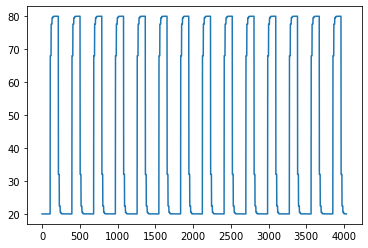

In [2]:
raw_values = timeseries['value'].to_numpy()

plt.plot(raw_values)
plt.show()

In [3]:
print(raw_values.shape)
print(raw_values)

(4032,)
[20.      20.      20.      ... 20.00384 20.00384 20.00384]


In [4]:
scaler = MinMaxScaler()
values = scaler.fit_transform(raw_values[:,np.newaxis])
L = len(values)

In [5]:
timestep_size = 100

def sample(values):
    x = []
    y = []

    L = len(values)
    for i in range(timestep_size, L-1):
        x.append(values[i-timestep_size:i, 0]) # Takes the first 12 samples
        y.append(values[i, 0]) # Predicts the 13th sample

    x = np.array(x)
    y = np.array(y)

    return x, y

# This will exclude the first timestep_size number of samples from predictions from the dataset i.e.

In [6]:
# Example on small list
X_mock, Y_mock = sample(np.arange(102)[:,np.newaxis]) 

print(X_mock.shape)
print(Y_mock.shape)
print("\n======\n")
print(X_mock[0])
print(Y_mock[0])

(1, 100)
(1,)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
100


In [7]:
X_2D, Y = sample(values)
print(X_2D.shape)
print(Y.shape)

(3931, 100)
(3931,)


In [8]:
# [batch_size, timesteps, output_size]
X = X_2D.reshape(X_2D.shape[0], X_2D.shape[1], 1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# TBD: Use a single layer single neuron RNN to make single step prediction for above timeseries 
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

simpleRNN = Sequential()
simpleRNN.add(SimpleRNN(1, input_shape=X[0].shape))
simpleRNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

simpleRNN.summary()

Using TensorFlow backend.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
simpleRNN.fit(X_train, Y_train, epochs=30, batch_size=25, verbose=1)


Epoch 1/30
3144/3144 [==============================] - 3s 1ms/step - loss: 0.9599 - accuracy: 0.3524
Epoch 2/30
3144/3144 [==============================] - 3s 890us/step - loss: 0.2612 - accuracy: 0.3524
Epoch 3/30
3144/3144 [==============================] - 3s 977us/step - loss: 0.1844 - accuracy: 0.3524
Epoch 4/30
3144/3144 [==============================] - 4s 1ms/step - loss: 0.1260 - accuracy: 0.3823
Epoch 5/30
3144/3144 [==============================] - 4s 1ms/step - loss: 0.0811 - accuracy: 0.3982
Epoch 6/30
3144/3144 [==============================] - 4s 1ms/step - loss: 0.0570 - accuracy: 0.3982
Epoch 7/30
3144/3144 [==============================] - 4s 1ms/step - loss: 0.0466 - accuracy: 0.3982
Epoch 8/30
3144/3144 [==============================] - 3s 1ms/step - loss: 0.0419 - accuracy: 0.3982
Epoch 9/30
3144/3144 [==============================] - 3s 869us/step - loss: 0.0389 - accuracy: 0.3982
Epoch 10/30
3144/3144 [==============================] - 3s 900us/step - lo

In [12]:
simpleRNN.evaluate(X_test, Y_test)

787/787 [==============================] - 0s 473us/step


[0.01630173828050475, 0.4167725443840027]

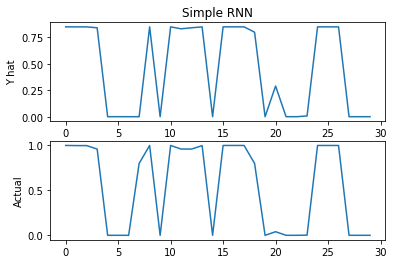

In [13]:
Y_hat = simpleRNN.predict(X_test)

# Simple vs Actual
plt.subplot(2,1,1)
plt.plot(Y_hat[:30])
plt.title('Simple RNN')
plt.ylabel('Y hat')
plt.subplot(2,1,2)
plt.plot(Y_test[:30])
plt.ylabel('Actual')
plt.show()

## Deep RNN

In [14]:
from keras.layers import LSTM

# TBD: Use following RNN architecture to make single step prediction for given timeseries 
# Layer1 (10 Neurons)
# Layer2 (10 Neurons)
# Layer3 (1 Neurons) Output Layer

deepRNN = Sequential()
deepRNN.add(SimpleRNN(10, return_sequences=True, input_shape=X[0].shape))
deepRNN.add(SimpleRNN(10, return_sequences=True))
deepRNN.add(SimpleRNN(1))
deepRNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
deepRNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100, 10)           120       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 100, 10)           210       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 1)                 12        
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


In [15]:
deepRNN.fit(X_train, Y_train, epochs=30, batch_size=25, verbose=1)

Epoch 1/30
3144/3144 [==============================] - 12s 4ms/step - loss: 0.1034 - accuracy: 0.3445
Epoch 2/30
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0223 - accuracy: 0.3982
Epoch 3/30
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0186 - accuracy: 0.3982
Epoch 4/30
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0169 - accuracy: 0.3982
Epoch 5/30
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0153 - accuracy: 0.3982
Epoch 6/30
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0139 - accuracy: 0.3982
Epoch 7/30
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0123 - accuracy: 0.3982
Epoch 8/30
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0108 - accuracy: 0.3982
Epoch 9/30
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0097 - accuracy: 0.3982
Epoch 10/30
3144/3144 [==============================] - 10s 3ms/step - l

In [16]:
deepRNN.evaluate(X_test, Y_test)

787/787 [==============================] - 1s 1ms/step


[0.005442115725544689, 0.4167725443840027]

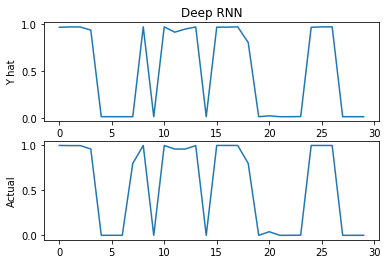

In [17]:
Y_hat_deep = deepRNN.predict(X_test)

# Deep vs Actual
plt.subplot(2,1,1)
plt.plot(Y_hat_deep[:30])
plt.title('Deep RNN')
plt.ylabel('Y hat')
plt.subplot(2,1,2)
plt.plot(Y_test[:30])
plt.ylabel('Actual')
plt.show()

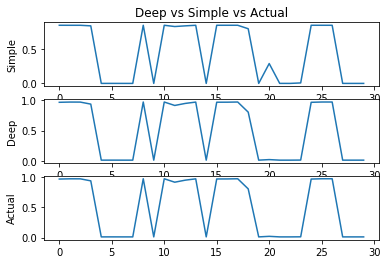

In [18]:
# Deep vs Simple vs Actual
plt.subplot(3,1,1)
plt.plot(Y_hat[:30])
plt.title('Deep vs Simple vs Actual')
plt.ylabel('Simple')
plt.subplot(3,1,2)
plt.plot(Y_hat_deep[:30])
plt.ylabel('Deep')
plt.subplot(3,1,3)
plt.plot(Y_hat_deep[:30])
plt.ylabel('Actual')
plt.show()

## Deep RNN (Multi step prediction)

In [19]:
# TBD: Use following RNN architecture to make multi step prediction (5) for given timeseries 
# Remember 'values' variable is all data processed

# Direct Approach (Train to output 5 steps)
timestep_size = 100
def sample_5(values):
    x = []
    y = []

    for i in range(timestep_size, L-6): # extra -5 from additional size off y
        x.append(values[i-timestep_size:i, 0]) # Takes the first 12 samples
        y.append(values[i:i+5, 0]) # Predicts the 13th sample

    x = np.array(x)
    y = np.array(y)

    return x, y

In [20]:
Xb_2D, Yb = sample_5(values)

In [21]:
Xb = Xb_2D.reshape(Xb_2D.shape[0], Xb_2D.shape[1], 1)
print(X.shape)

(3931, 100, 1)


In [22]:
Xb_train, Xb_test, Yb_train, Yb_test = train_test_split(Xb, Yb, test_size=0.2, random_state=42) 

In [23]:
# Layer1 (20 Neurons)
# Layer2 (20 Neurons)
# Layer3 (10 Neurons)
# Layer3 (5 Neurons) Output Layer

from keras.layers import LSTM

multiRNN = Sequential()
multiRNN.add(LSTM(20, return_sequences=True, input_shape=(Xb.shape[1], 1)))
multiRNN.add(LSTM(20, return_sequences=True))
multiRNN.add(LSTM(10, return_sequences=True))
multiRNN.add(LSTM(5))
multiRNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

multiRNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 20)           1760      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 20)           3280      
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 10)           1240      
_________________________________________________________________
lstm_4 (LSTM)                (None, 5)                 320       
Total params: 6,600
Trainable params: 6,600
Non-trainable params: 0
_________________________________________________________________


In [24]:
multiRNN.fit(Xb_train, Yb_train, epochs=15, batch_size=25, verbose=1)

Epoch 1/15
3140/3140 [==============================] - 40s 13ms/step - loss: 0.1254 - accuracy: 0.0707
Epoch 2/15
3140/3140 [==============================] - 36s 11ms/step - loss: 0.0398 - accuracy: 0.0452
Epoch 3/15
3140/3140 [==============================] - 36s 11ms/step - loss: 0.0302 - accuracy: 0.0634
Epoch 4/15
3140/3140 [==============================] - 36s 11ms/step - loss: 0.0268 - accuracy: 0.1178
Epoch 5/15
3140/3140 [==============================] - 38s 12ms/step - loss: 0.0255 - accuracy: 0.1169
Epoch 6/15
3140/3140 [==============================] - 38s 12ms/step - loss: 0.0224 - accuracy: 0.1178
Epoch 7/15
3140/3140 [==============================] - 36s 11ms/step - loss: 0.0219 - accuracy: 0.1643
Epoch 8/15
3140/3140 [==============================] - 36s 11ms/step - loss: 0.0202 - accuracy: 0.1682
Epoch 9/15
3140/3140 [==============================] - 37s 12ms/step - loss: 0.0191 - accuracy: 0.2182
Epoch 10/15
3140/3140 [==============================] - 36s 11m

In [25]:
multiRNN.evaluate(Xb_test, Yb_test)

786/786 [==============================] - 2s 3ms/step


[0.018169838736075482, 0.0661577582359314]

In [26]:
Y_hat_multi = multiRNN.predict(Xb_test)

# Deep vs Actual
def result_plt(batch):
    # plt.subplot(2,1,1)
    plt.scatter(np.arange(5), Y_hat_multi[batch], label='Y hat')
    plt.title('Deep RNN')
    # plt.ylabel('Y hat')
    # plt.subplot(2,1,2)
    plt.scatter(np.arange(5), Yb_test[batch], label='Actual')
    # plt.ylabel('Actual')
    plt.show()

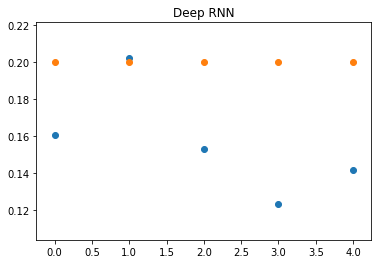

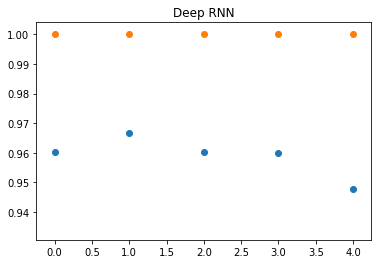

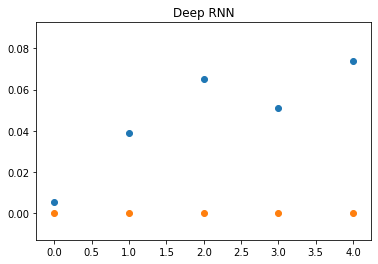

In [27]:
result_plt(32)
result_plt(135)
result_plt(9)

In [76]:
# Recursive Approach
def multi5(X_np):
    X_list = np.reshape(X_np, (X_np.shape[0],))
    result = []

    for i in range(5):
        y_hat = deepRNN.predict(np.reshape(X_list, (1, 100, 1)))
        X_list = X_list[1:]
        X_list = np.append(X_list, y_hat)
        result.append(y_hat[0][0])

    return result

In [77]:
multi5(X[0])

[0.010268531, 0.02195991, 0.04179904, 0.068550766, 0.10619303]

In [93]:
def result_plt_multi5(batch, fn):
    plt.plot(fn(X_test[batch]), label='Y hat', marker='o')
    plt.title('Recursive Multi-Step RNN')
    plt.plot(Y_test[batch:batch+5], label='Actual', marker='o')
    plt.legend()
    plt.set_yticks()
    plt.show()

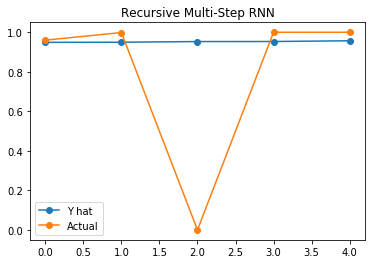

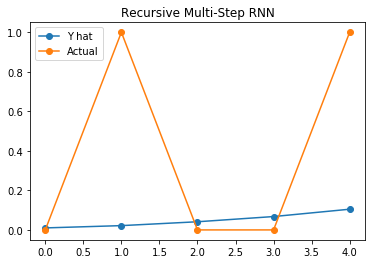

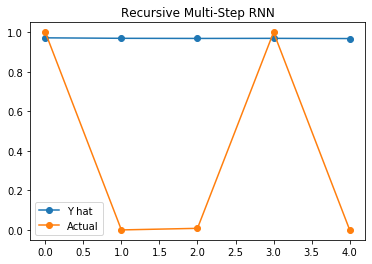

In [94]:
result_plt_multi5(12, multi5)
result_plt_multi5(78, multi5)
result_plt_multi5(140, multi5)